# **Session 2: Foundations of Machine Learning - Part Two**
This session continues the introduction of the foundations of machine learning. Specifically it will outline the core components of deep learning and the fundamental concepts needed to gain intuition into the dynamics of ***training*** neural networks.


---


In [ ]:
# --- set up our imports for this session ---
import torch
import numpy as np
import matplotlib.pyplot as plt

## **Fully Connected Network Architecture**

For now we will only consider whats called a ***fully connnected (FC)*** neural network architecture. The network is essentially a directed graph whose nodes are refered to as neurons. A layer is a grouping of neurons that uniformally perform the same computations at the same depth of a network.

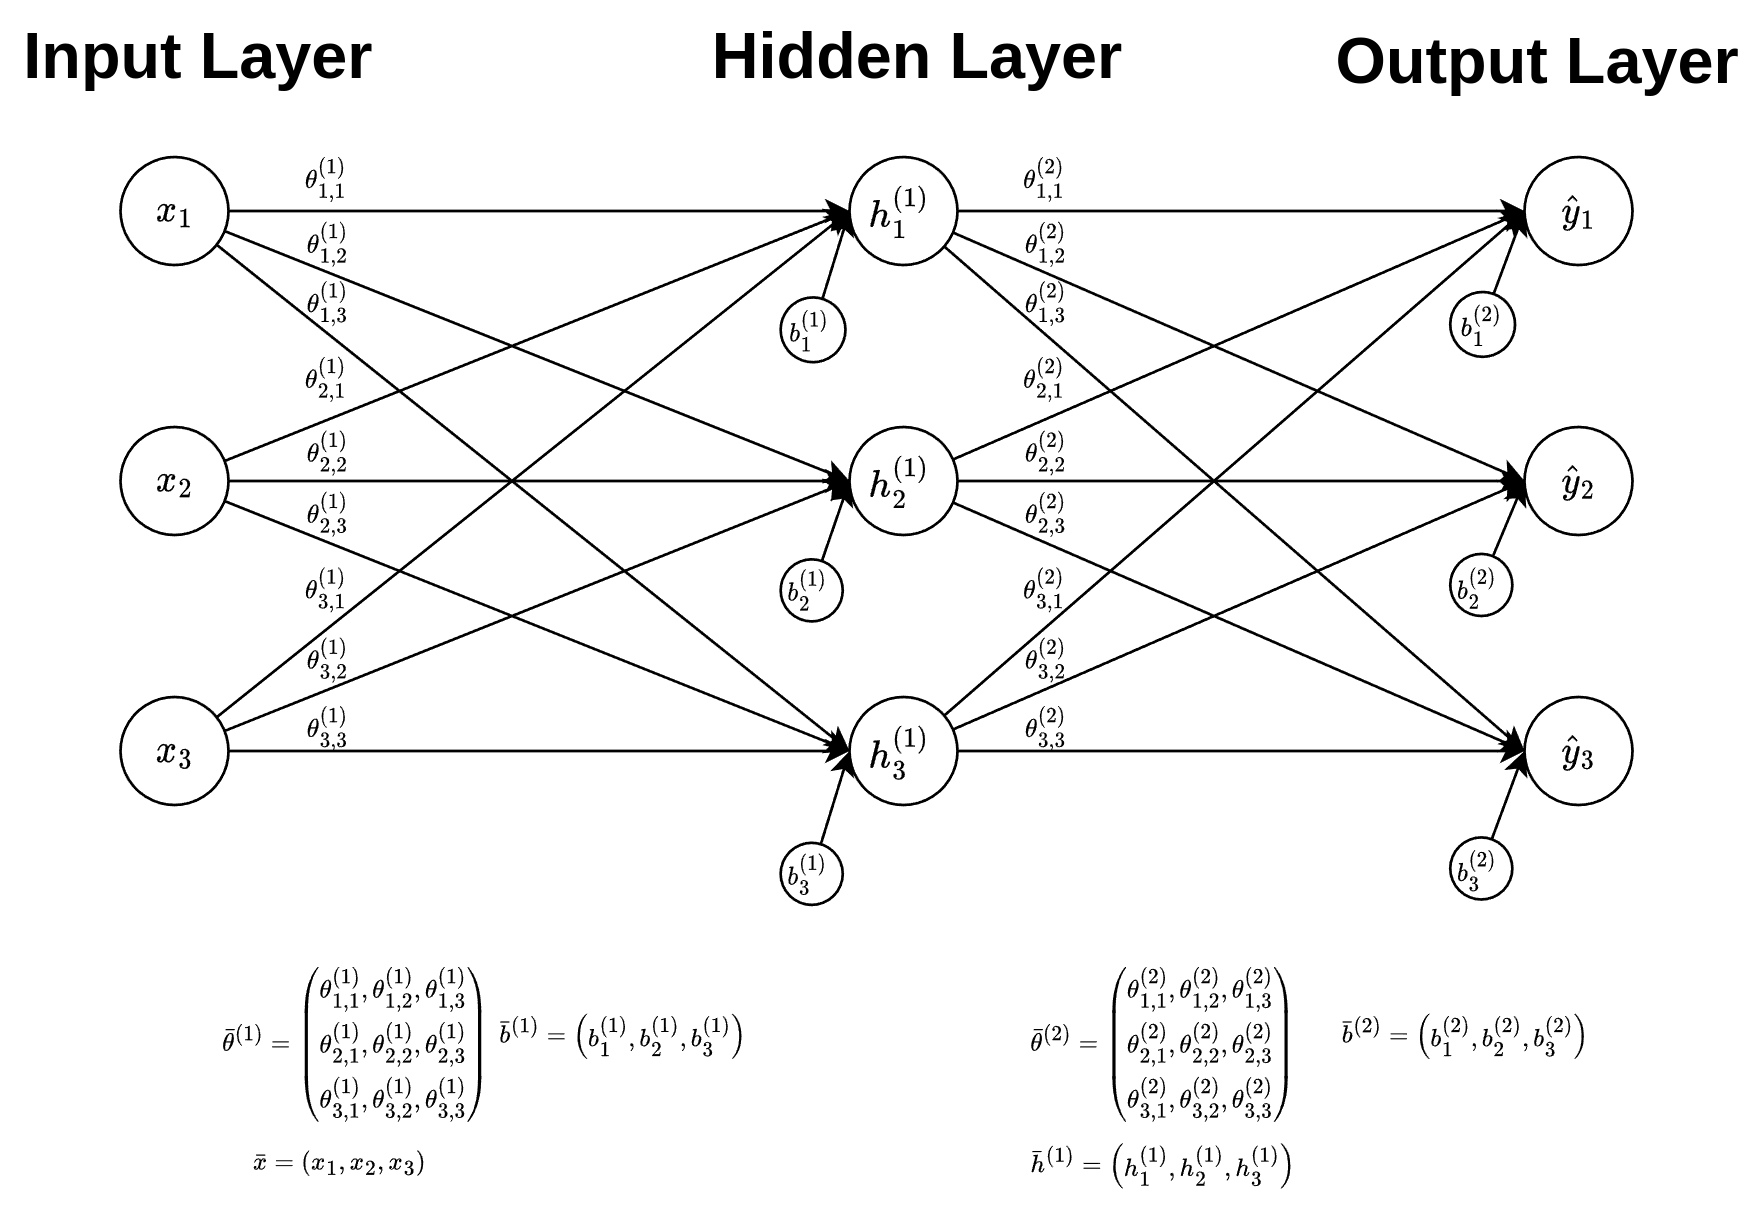

### ***A Single Neuron***



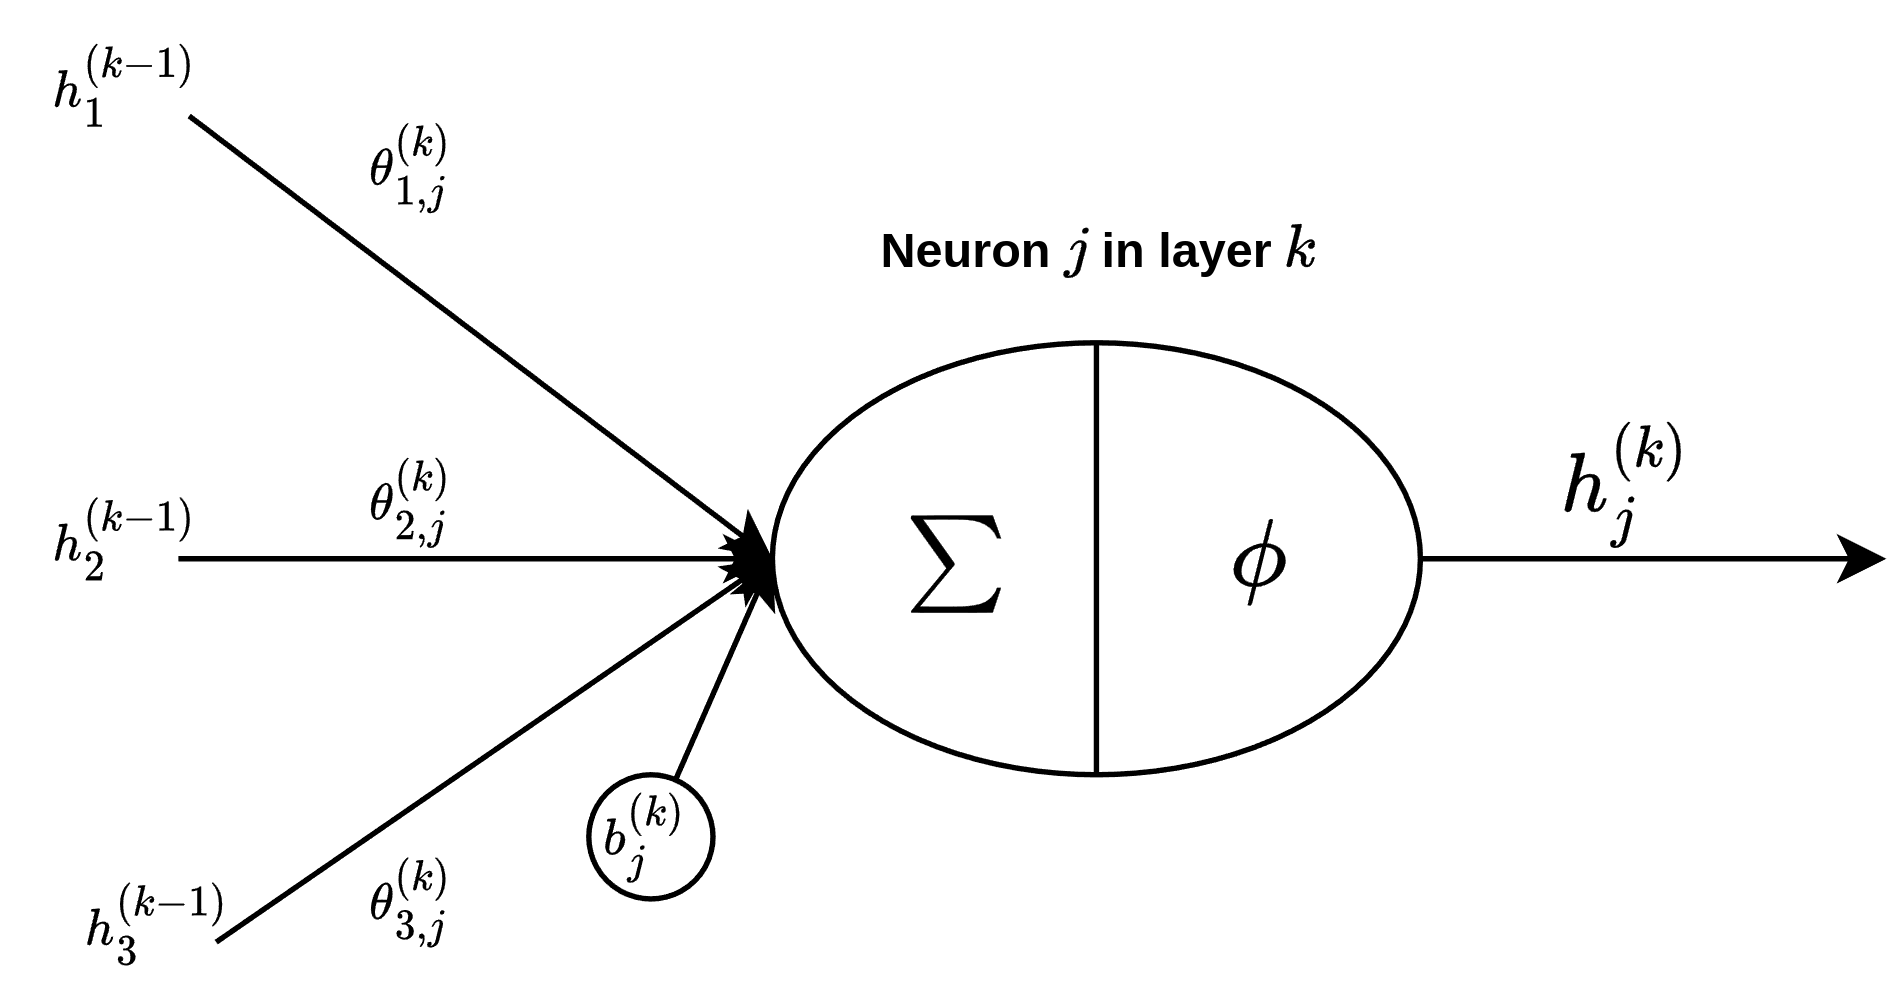

#### *The Neuron Decomposed*



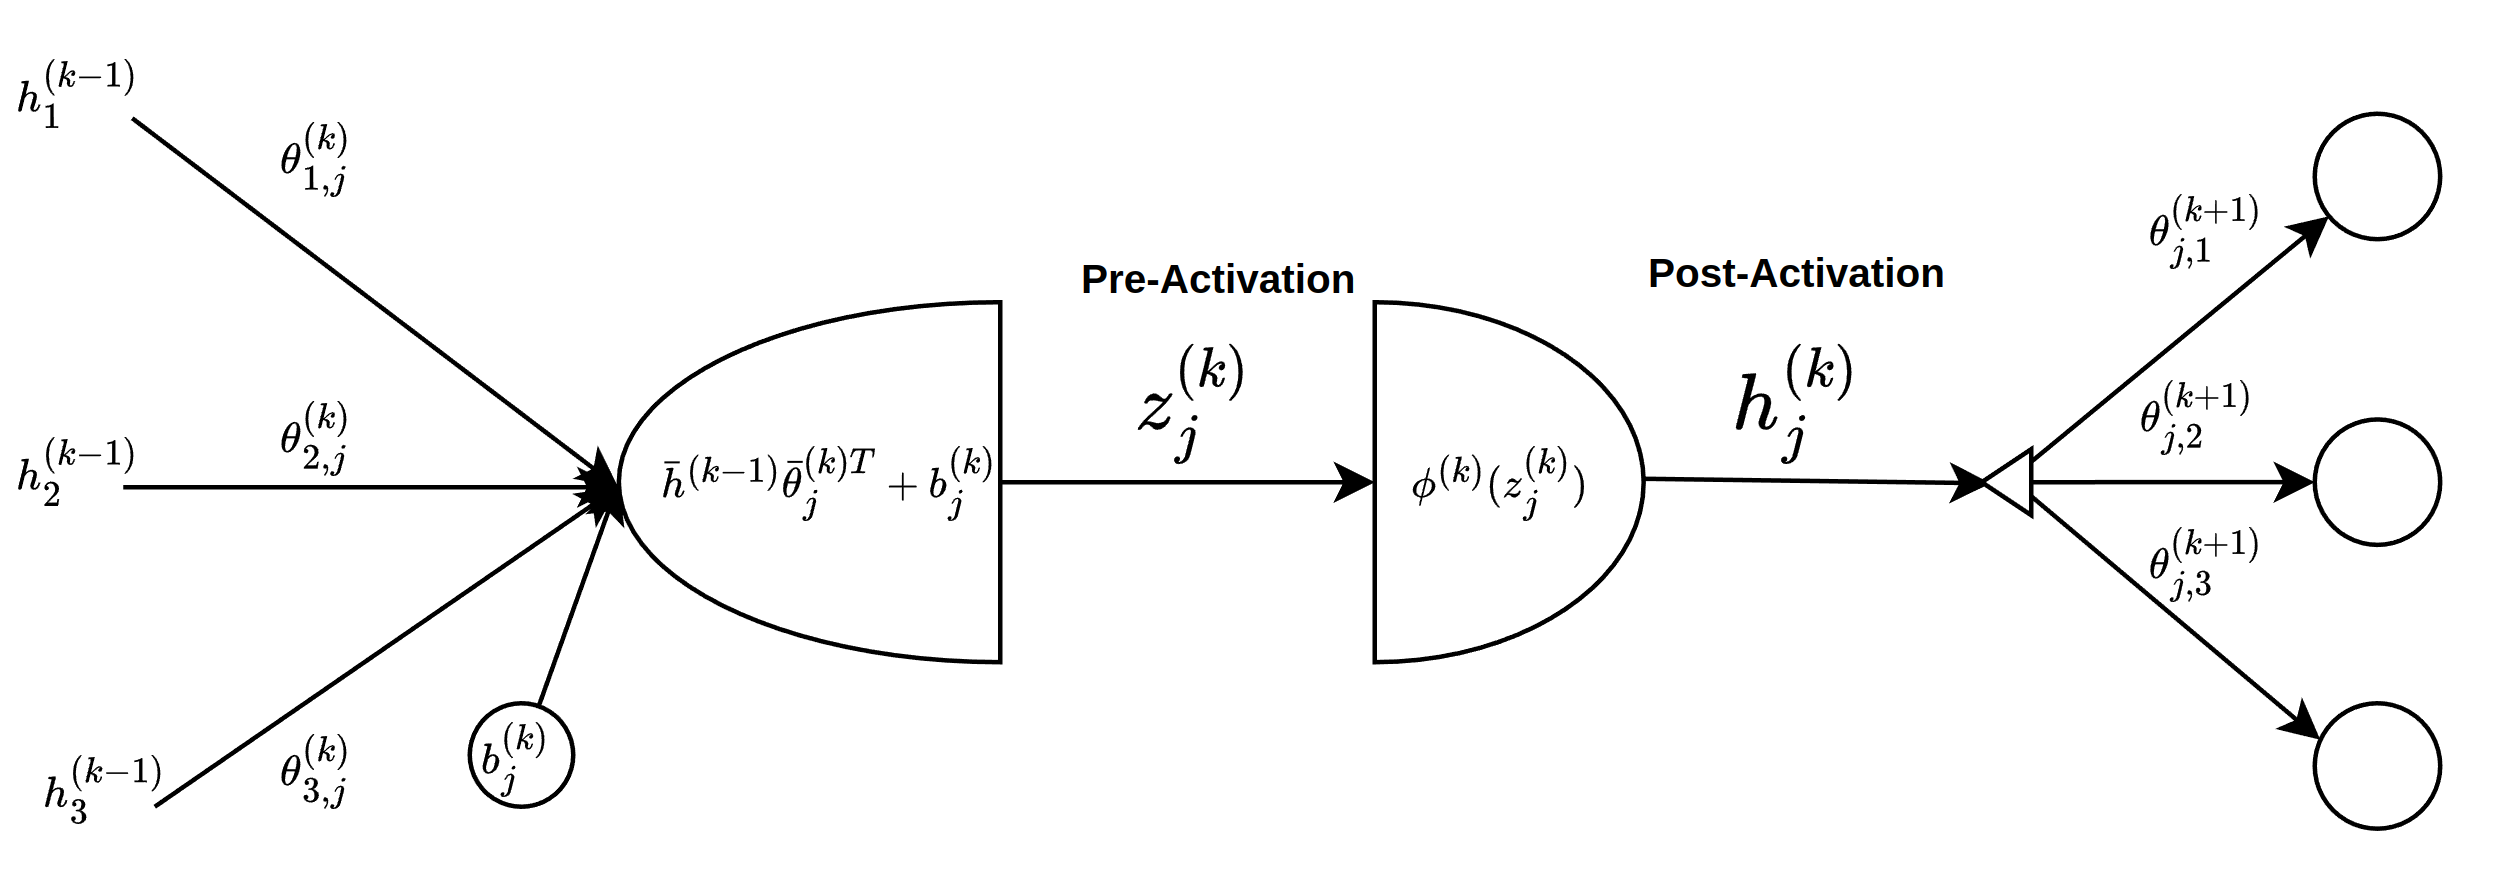

#### *The Decomposed Math*

Decomposing the neuron's math will help us easily work through the backprogation algorithm presented later.

---


The pre-activation function for the $j$th neuron in the $k$th layer is defined as:

$z_j^{(k)} = \bar{h}^{(k-1)} \bar{\theta_j}^{(k)T} + b_j^{(k)}$

*where*
- $\bar{h}^{(k-1)} = [h_1^{(k-1)}, h_2^{(k-1)}, ..., h_{m_{k-1}}^{(k-1)}]$ vector of outputs from the previous layer $k-1$
- $\bar{\theta_j}^{(k)} = [\theta_{1,j}^{(k)}, \theta_{2,j}^{(k)}, ..., \theta_{m_{k-1},j}^{(k)}]^T$ is the vector of parameters connecting the outputs from the previous layer to the $j$th neuron in the $k$th layer.
- $z_j^{(k)} = $ the pre-activation value of the $j$th neuron in the $k$th layer.



---


The post activation function for the $j$th neuron in the $k$th layer is defined as:

$h_j^{(k)} = \phi^{(k)}(z_j^{(k)}) $

*where*
- $z_j^{(k)} = $ the pre-activation value for the $j$th neuron of the $k$th layer.
- $\phi^{(k)} = $ the activation function for the $k$th layer.
- $h_j^{(k)} = $ the final output of the $j$th neuron of the $k$th layer.

## **Activation Functions**
As discussed previously, the power in neural networks lies in its non-linear transformation capabilities which are provided by applying non-linear activation functions. There are dozens of variants of activation functions that one can find out about through literature reviews and browsing through Pytorch's library, but we will present a handful of fundamental activation function that are commonly used.

Links:
- [Article for Activation Functions](https://www.v7labs.com/blog/neural-networks-activation-functions)

In [ ]:
def plot_activation_function(act_f, derivative_act_f, act_name, spread):
  x_act = torch.linspace(spread[0], spread[1], 1000)
  y_act = act_f(x_act)
  y_deriv = derivative_act_f(x_act)
  fig, ax = plt.subplots(figsize=(9, 5))
  ax.spines['left'].set_position('zero')
  ax.spines['bottom'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')
  ax.plot(x_act,y_act, color="#307EC7", linewidth=3, label=act_name)
  ax.plot(x_act,y_deriv, color="#9621E2", linewidth=3, label="derivative")
  ax.legend(loc="upper left", frameon=False)
  fig.show()


### ***Sigmoid***
The sigmoid activation function scales its inputs between 0 and 1 creating a representation of probabilities.

*Pros*:
- Able to produce a representation of probabilities.

*Cons*:
- Sigmoids saturate and kill gradients. It gives rise to a problem of “vanishing gradients” as its maximum gradient value is 0.25.


---


$ \phi_{\sigma}(z)=   \frac{1}{1 + exp(-z)}$

$ \phi^{'}_{\sigma}(z)=   \phi_{\sigma}(z) (1 - \phi_{\sigma}(z)) $


---


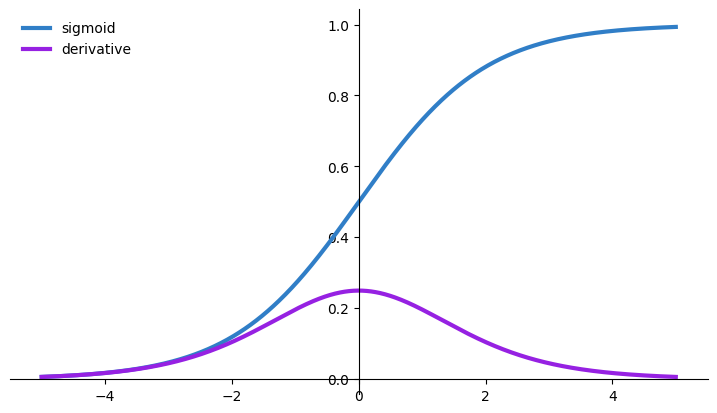

In [ ]:
plot_activation_function(torch.sigmoid, lambda x: torch.sigmoid(x)*(1.0 - torch.sigmoid(x)), "sigmoid", (-5, 5))


### ***Softmax***
The softmax activation function scales its inputs between 0 and 1 creating a representation of probabilities for multiclass outputs. Softmax is generally only used on the output layer, and acts the same way sigmoid does for binary classification problems but for multi-class classification problems.

*Pros*:
- Able to produce a representation of probabilities for multiple classes.

*Cons*:
- Saturate and kill gradients. It gives rise to a problem of “vanishing gradients” as its maximum gradient value is 0.25.

Links:
- [Derivative of the Softmax Function](https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1)
---


$ \phi_{softmax}(z_i)=   \frac{\exp(z_i)}{\sum_j^k \exp(z_j)}$ for $j\in\{1,..., k\}$ for $k$ classes.

$ \phi^{'}_{softmax}(z_i)=   \phi_{softmax}(z_i) (1 - \phi_{softmax}(z_i)) $


---



### ***Tanh***
The tanh activation function scales its inputs between -1 and 1.

*Pros*:
- Can produce negative outputs.

*Cons*:
- Similarly to sigmoid units, tanh saturate and kill gradients. It gives rise to a problem of “vanishing gradients”.


---
$ \phi_{\tanh}(z)=   \tanh(z)$

$ \phi^{'}_{\tanh}(z)=   1 - \phi_{\tanh}(z)^2 $


---



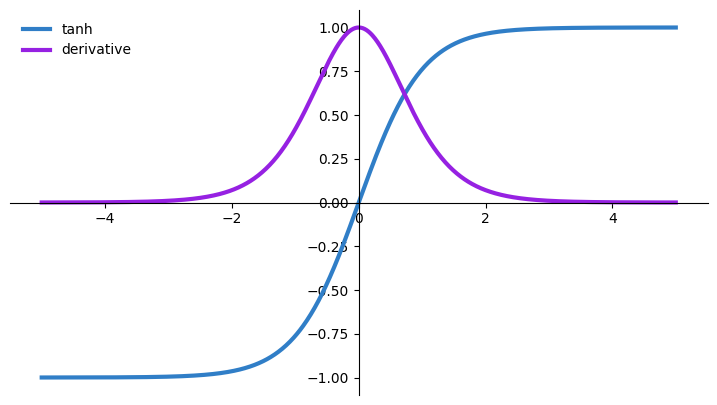

In [ ]:
plot_activation_function(torch.tanh, lambda x: 1.0 - torch.tanh(x)**2, "tanh", (-5, 5))


### ***ReLU***
*Rectified Linear Unit (ReLU)*



*Pros*:
- It expedites convergence of the training procedure and leads to better solutions than conventional sigmoid-like units.

*Cons*:
- Experiences the "dead" neuron problem which is when the gradient is zero, it can no longer learn.


---



$ \phi_{ReLU}(z)=   \left\{\begin{array}{ll}
      z & z\ge0 \\
      0 & otherwise \\
\end{array} \right.  $

$ \phi^{'}_{ReLU}(z)=   \left\{\begin{array}{ll}
      1 & z\ge0 \\
      0 & otherwise \\
\end{array} \right.  $



---

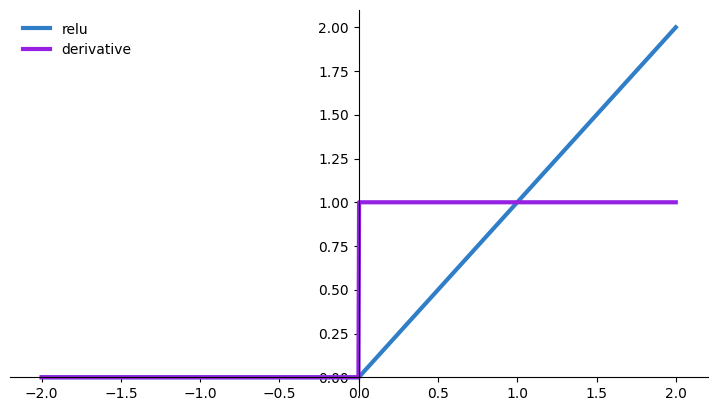

In [ ]:
plot_activation_function(torch.relu, lambda x: torch.where(x >= 0, 1.0, 0.0), "relu", (-2, 2))


### ***PReLU***
*Parametric Rectified Linear Unit (PReLU)* is a variation of ReLU where the parameter $a$ is learned, creating specialized activation function that can increase accuracy.


*Pros*:
- Provides increase accuracy over LReLU and ReLU units.
- Allievates the "dead" neuron problem.

*Cons*:
- Adds an additional parameter for learning.

---


$ \phi_{PReLU}(z)=   \left\{\begin{array}{ll}
      z & z\ge0 \\
      az & otherwise \\
\end{array} \right.  $

$ \phi^{'}_{PReLU}(z)=   \left\{\begin{array}{ll}
      1 & z\ge0 \\
      a & otherwise \\
\end{array} \right.  $



---


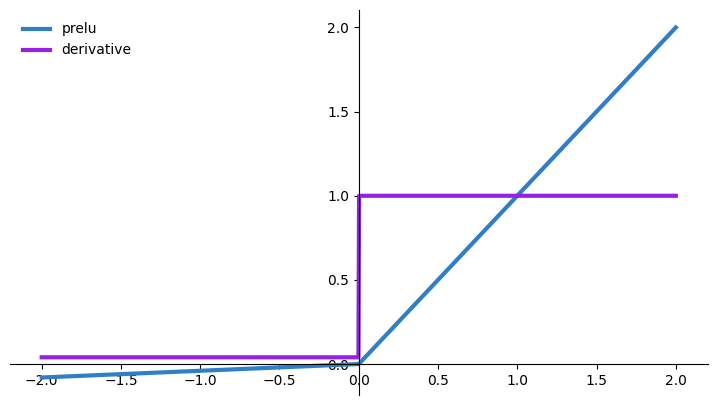

In [ ]:
plot_activation_function(lambda x: torch.nn.functional.prelu(x, torch.tensor(0.04)), lambda x: torch.where(x >= 0, 1.0, 0.04), "prelu", (-2, 2))


### ***ELU***
*Exponential Linear Unit (ELU)* is a variation of ReLU where the parameter $a$ is learned, creating specialized activation function that can increase accuracy.


*Pros*:
- Allievates the vanishing gradient problem.
- Provides negative outputs to push mean unit activations closer to zero, which can speed up training.
- Provides a noise robust deactivation state.
- Can lead to better generalization.

*Cons*:
- Higher computational complexity
- Gradient still goes to zero for large negative values.

---

$ \phi_{ELU}(z)=   \left\{\begin{array}{ll}
      z & z\ge0 \\
      \alpha (e^z-1) & otherwise \\
\end{array} \right.  $

$ \phi^{'}_{ELU}(z)=   \left\{\begin{array}{ll}
      1 & z\ge0 \\
      \phi_{ELU}(z) + \alpha & otherwise \\
\end{array} \right.  $


---



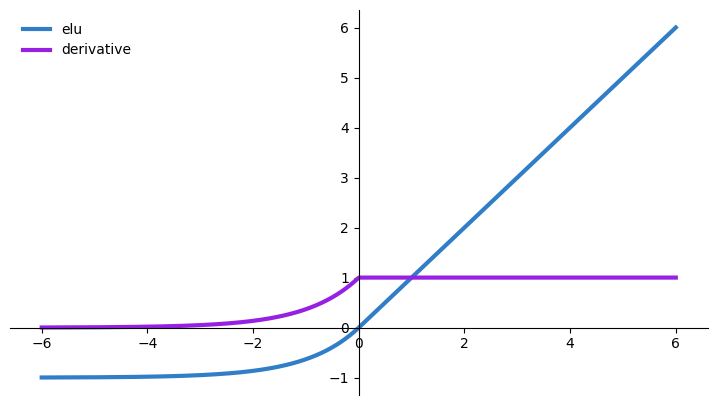

In [ ]:
plot_activation_function(torch.nn.functional.elu, lambda x: torch.where(x >= 0, 1.0, torch.nn.functional.elu(x) + 1.0), "elu", (-6, 6))


## **Training Deep Models Using Backpropagation**

One of the biggest challenges with deep learning is training the models efficiently and reliably. The history of trying to train neural networks is a long and arduous battle that I won't dive into. Instead we will look at the routine that is generally used to train neural networks and then examine some of the issues that present themselves for this standard training paradigm.


The backpropagation algorithm is the standard methodlogy utilized for solving the gradients of the parameters for a neural network. It is the same algorithm that is executed when you call Pytorch's `loss.backward()` function.

Let us recall the update equation for driving a models parameters toward the state which minimizes the loss function:

$\theta_{n+1} = \theta_{n} - \alpha_{n} \frac{\partial L(\theta_{n}, D)}{\partial \theta_n}$

If we think in depth about this, it may appear murky as how to find $\frac{\partial L(\theta_{n}, D)}{\partial \theta_n}$ since the loss function is only applied to the outputs of a network. To find this relationship we need to mathematically link the output neurons to each parameter in the model.

We will see that the common pattern needed is that for each layer we need to relate its parameters to the outputs of the next layer. To do this we will need to derive the gradient of the loss function, $L$, with respect to each layer's output $h^{(k)}$, which is denoted $ \frac{\partial L}{\partial h^{(k)}}$. We will also need to find the gradient from each layer's output with respect to the previous layer's output, $\frac{\partial h^{(k+1)}}{\partial h^{(k)}} $.


***Links***:
- [Backpropagation From Scratch: Part 1](https://towardsdatascience.com/deriving-the-backpropagation-equations-from-scratch-part-1-343b300c585a)
- [Backpropagation From Scratch: Part 2](https://towardsdatascience.com/deriving-the-backpropagation-equations-from-scratch-part-2-693d4162e779)


### ***Computing the Deltas***

Lets denote a helpful term:



$\delta(k, i) = \frac{\partial L}{\partial h_i^{(k)}} \frac{\partial h_i^{(k)}}{\partial z_i^{(k)}}$
- $ \frac{\partial h_i^{(k)}}{\partial z_i^{(k)}} =$ *local derivative of the activation function* $ = \frac{\partial}{\partial z_i^{(k)}} \phi^{(k)}(z_i^{(k)}) = \phi^{'(k)}(z_i^{(k)})$

$\delta(k, i) = \frac{\partial L}{\partial h_i^{(k)}} \phi^{'(k)}(z_i^{(k)})$
- $ \phi^{'(k)} = $ the derivate of the activation function for the $k$th layer.


#### *Computing the Gradients of the Outputs*

We now define the gradient of the loss with respect to the output for each layer (in this case the $i$th neuron of the $k$th layer has $t$ different connections to the neurons in the next $k+1$ layer):

$\frac{\partial L}{\partial h_i^{(k)}} = \sum_{t} \frac{\partial L}{\partial h_t^{(k+1)}} \frac{\partial h_t^{(k+1)}}{\partial h_i^{(k)}} =   \sum_{t} \frac{\partial L}{\partial h_t^{(k+1)}} \frac{\partial h_t^{(k+1)}}{\partial z_t^{(k+1)}} \frac{\partial z_t^{(k+1)}}{\partial h_i^{(k)}} = \sum_{t} \delta(k+1, t) \frac{\partial z_t^{(k+1)}}{\partial h_i^{(k)}} $

- $\frac{\partial z_t^{(k+1)}}{\partial h_i^{(k)}} =  \frac{\partial}{\partial h_i^{(k)}} h_i^{(k)}\theta_{it}^{(k + 1)} + b_t^{(k + 1)} = \theta_{it}^{(k + 1)}$

$\frac{\partial L}{\partial h_i^{(k)}} =  \sum_{t} \delta(k+1, t) \theta_{it}^{(k + 1)}$


If the $k$th layer is not the last layer then $\delta$ can be expressed as:

$\delta(k, i) = \phi^{'(k)}(z_i^{(k)}) \sum_{t} \delta(k+1, t) \theta_{it}^{(k + 1)}$


For the last layer, which is the $p$th layer, the $\delta$ term simplifies to:

$\delta(p, i) =  \frac{\partial L}{\partial \hat{y}_i}\phi^{'(p)}(z_i^{(p)})$

For the special case where the final layer's activation function is identity (regression style) then the delta of the final layer is:


$\delta(p, i) =  \frac{\partial L}{\partial \hat{y}_i}$

---

### ***Computing the Gradients for Scaling Factors***
*For the weighting factor:*

$\frac{\partial L}{\partial \theta_{ij}^{(k)}} = \frac{\partial L}{\partial h_j^{(k)}} \frac{\partial h_j^{(k)}}{\partial \theta_{ij}^{(k)}} =  \frac{\partial L}{\partial h_j^{(k)}} \frac{\partial h_j^{(k)}}{\partial z_j^{(k)}} \frac{\partial z_j^{(k)}}{\partial \theta_{ij}^{(k)}} = \delta(k, j)\frac{\partial z_j^{(k)}}{\partial \theta_{ij}^{(k)}}$

- $\frac{\partial z_j^{(k)}}{\partial \theta_{ij}^{(k)}} = $ *derivative of the linear model* $ = \frac{\partial}{\partial \theta_{ij}^{(k)}} h_i^{(k-1)}\theta_{ij}^{(k)} + b_j^{(k)} = h_i^{(k-1)}$


$\frac{\partial L}{\partial \theta_{ij}^{(k)}} = \delta(k, j) h_i^{(k-1)}$



### ***Computing the Gradients for the Bias***

*For the bias:*

$\frac{\partial L}{\partial b_{j}^{(k)}} = \frac{\partial L}{\partial h_j^{(k)}} \frac{\partial h_j^{(k)}}{\partial b_{j}^{(k)}} =  \frac{\partial L}{\partial h_j^{(k)}} \frac{\partial h_j^{(k)}}{\partial z_j^{(k)}} \frac{\partial z_j^{(k)}}{\partial b_{j}^{(k)}} = \delta(k, j)\frac{\partial z_j^{(k)}}{\partial b_{j}^{(k)}}$



- $\frac{\partial z_j^{(k)}}{\partial b_{j}^{(k)}} = $ *derivative of the linear model* $ = \frac{\partial}{\partial b_{j}^{(k)}} \bar{h}^{(k-1)} \bar{\theta_j}^{(k)T} + b_j^{(k)} = 1$


$\frac{\partial L}{\partial b_{j}^{(k)}} = \delta(k, j)$



### ***Dynamic Programming***

To solve the above equations, the approach of dynamic programming is utilized. Dynamic programming is an algorithmic paradigm that simplifies a problem by breaking it down into simpler subproblems in a recursive manner.
In practice, dynamic programming starts with the output or final solution of a sequence and works backwards, solving the optimal solution using the optimal solution in the step after it.

Applying this to our network, lets create an algorithm for solving our gradients.


1. Given the following criteria:
  - Dataset - $D = \{(x_0, y_0), (x_1, y_1), ..., (x_N, y_N)\}$
  - Loss function $L$.
  - Model $F$ with $p$ layers, not including the input layer.
2. Compute the forward pass through the model, $F$, for each instance $(𝐱, 𝐲) \in D$ storing the outputs, $H = \{\bar{h}^{(k)}\}$ $\forall k \in \{1, ..., p\}$, and pre-activation values, $Z = \{\bar{z}^{k}\} $ $\forall k \in \{1, ..., p\}$
 for each layer.
3. Compute the $\delta$ for the output layer for each output neuron:
  - $\delta(p, i) =  \frac{\partial L}{\partial \hat{y}_i}\phi^{'(p)}(z_i^{(p)})$, $\forall i \in \{1, ..., m_p\}$ where $m_p$ is the number of neurons in the $p$th layer.
    - Example: For a loss function, $L_{MSE} = \frac{1}{2}\sum_i (y_i - \hat{y}_i)^2$ and an output layer with an identity activation function (regression),  $\delta(p, i) = -(y_i - \hat{y})$.
4. Starting with the last hidden layer and working back to the first hidden layer, compute the following $\delta$ for each layer:
  - $\delta(k, i) = \phi^{'(k)}(z_i^{(k)}) \sum_{t}^{m_{k+1}} \delta(k+1, t) \theta_{it}^{(k + 1)}$, $\forall i \in \{1, ..., m_k\}$ where $m_k$ is the number of neurons in the $k$th layer.
    - $m_{k+1}$ is the number of neurons in the next $k+1$th layer.
5. For each hidden layer, $k \in \{1, ..., p - 1\}$, compute the gradient for each parameter in the layer:
  - $\frac{\partial L}{\partial \theta_{ij}^{(k)}} = \delta(k, j) h_{i}^{(k-1)}$, $\forall j \in \{1, ..., m_k\}$ and $\forall i \in \{1, ..., m_{k-1}\}$.
  - $\frac{\partial L}{\partial b_{j}^{(k)}} = \delta(k, j)$, $\forall j \in \{1, ..., m_k\}$.

6. Accumulate the gradients over the batch of $N$ instances in the dataset:
  - $\frac{\partial L}{\partial \theta_{ij}^{(k)}} = \frac{1}{N}\sum_l^{N} (\frac{\partial L}{\partial \theta_{ij}^{(k)}})_l$, $\forall j \in \{1, ..., m_k\}$ and $\forall i \in \{1, ..., m_{k-1}\}$.
  - $\frac{\partial L}{\partial b_{j}^{(k)}} = \frac{1}{N}\sum_l^{N} (\frac{\partial L}{\partial b_{j}^{(k)}})_l$, $\forall j \in \{1, ..., m_k\}$.
7. Update the model's parameters:
  - $\theta^{(k)}_{ij} = \theta^{(k)}_{ij} - \alpha \frac{\partial L}{\partial \theta_{ij}^{(k)}} $
  - $b^{(k)}_{j} = b^{(k)}_{j} - \alpha \frac{\partial L}{\partial b_{j}^{(k)}} $



### ***Simple Regression Example***



Epoch 7999  Loss: 0.2111


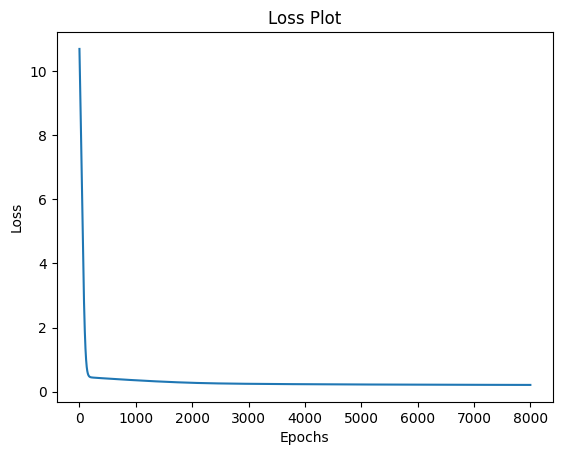

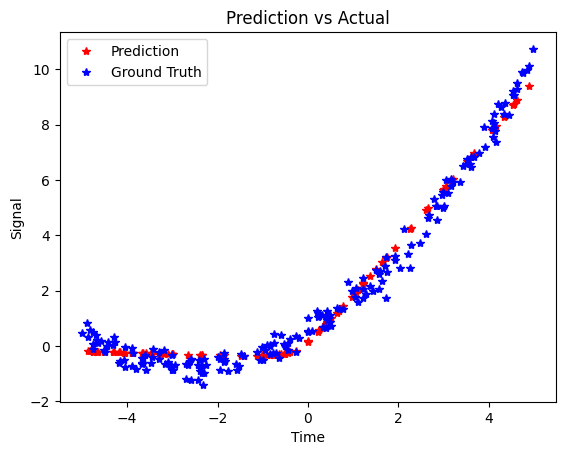

In [ ]:
# --- this manual seed provides good initialization of the weights ---
torch.manual_seed(476201242763657985)


class NeuralNet:

    def __init__(self, layers: list[dict]):

        self.weights = []
        self.activation_functions = []
        self.activation_functions_derivative = []
        self.layers = layers
        self.create_network()

    def create_network(self):
        for idx in range(0, len(self.layers) - 2):
            # --- outputs are the rows x inputs are the columns ---
            weight = torch.randn(self.layers[idx + 1]["size"] + 1, self.layers[idx]["size"] + 1)
            # --- normal initialization ---
            weight = torch.nn.init.kaiming_uniform_(weight, a=np.sqrt(5))
            self.weights.append(weight)
            # --- record the activation function information ---
            self.activation_functions.append(self.layers[idx]["activation_function"])
            self.activation_functions_derivative.append(self.layers[idx]["activation_function_derivative"])

        # --- final layer whose output does not need a bias ---
        weight = torch.randn(self.layers[-1]["size"], self.layers[-2]["size"] + 1)
        self.weights.append(weight / np.sqrt(self.layers[-2]["size"]))
        # --- record the activation function information ---
        self.activation_functions.append(self.layers[-2]["activation_function"])
        self.activation_functions_derivative.append(self.layers[-2]["activation_function_derivative"])

    def predict(self, inputs, add_bias: bool = True):
        v = torch.atleast_2d(inputs)

        if add_bias:
            v = torch.column_stack([v, torch.ones(v.shape[0])])

        for idx in range(len(self.weights)):
            v = torch.matmul(v, self.weights[idx].t())
            v = self.activation_functions[idx](v)

        return v

    def backward_step(self, inputs, targets, alpha, derivative_of_loss_fn):

        # --- feedforward ---
        v = torch.atleast_2d(inputs)
        v = torch.column_stack([v, torch.ones(v.shape[0])])
        outputs = [v]
        z = []
        for idx in range(0, len(self.weights)):
            net = torch.matmul(outputs[-1], self.weights[idx].t())
            z.append(net)
            out = self.activation_functions[idx](net)
            outputs.append(out)

        # --- backpropagation ---
        # --- first the output layer ---
        last_output = outputs[-1]
        d_loss_d_output = derivative_of_loss_fn(last_output, targets)
        d_output_d_z = self.activation_functions_derivative[-1](z[-1])
        # --- dLdy * dydz ---
        deltas = [d_loss_d_output * d_output_d_z]

        # --- compute the deltas first ---
        for idx in range(len(outputs) - 2, 0, -1):
            # --- delta(k) = delta(k+1) * theta(k+1) * dphi(k) ---
            delta = torch.matmul(deltas[-1], self.weights[idx]) * self.activation_functions_derivative[idx](z[idx - 1])
            deltas.append(delta)

        # --- reverse the deltas ---
        deltas = deltas[::-1]

        # --- compute the gradients ---
        for idx in range(0, len(self.weights)):
            sum_d_loss_d_w = torch.zeros(self.weights[idx].shape)
            # --- for each neuron in this layer ---
            for jdx in range(outputs[idx].shape[1]):
                # --- for each connection from this neuron to the neurons in the next layer ---
                for kdx in range(deltas[idx].shape[1]):
                    # --- dLdw = delta * h ---
                    sum_d_loss_d_w[kdx, jdx] = torch.dot(outputs[idx][:, jdx], deltas[idx][:, kdx])
            self.weights[idx] += - alpha * sum_d_loss_d_w / inputs.shape[0]


def derivative_elu(inputs):
    return torch.where(inputs >= 0, 1.0, torch.nn.functional.elu(inputs) + 1.0)



# --- create the neural net ---
nn = NeuralNet([
    {"size": 1, "activation_function": torch.nn.functional.elu, "activation_function_derivative": derivative_elu},
    {"size": 2, "activation_function": torch.nn.functional.elu, "activation_function_derivative": derivative_elu},
    {"size": 2, "activation_function": torch.nn.functional.elu, "activation_function_derivative": derivative_elu},
    {"size": 1, "activation_function": lambda s: s, "activation_function_derivative": lambda s: torch.ones_like(s)}])


# --- set up our training data ---
def f(x, par):
    return par[0] + par[1] * x + par[2] * x ** 2


params = (0.5, 1, 0.2)
sigma = 0.3
number_of_data_points = 200
a = np.zeros([number_of_data_points, 2])
for i in range(number_of_data_points):
    a[i][0] = 10 * (np.random.random_sample() - 0.5)
    a[i][1] = f(a[i][0], params) + np.random.normal(0, sigma)

x_data = torch.asarray(a[:, 0]).reshape(-1, 1).float()
y_data = torch.asarray(a[:, 1]).reshape(-1, 1).float()

# --- set up gradient descent ---
number_of_epochs = 8000
lrn_rate = 0.001

# --- create the loss function ---
loss_fn = torch.nn.MSELoss()
acceptable_loss = 0.1

# --- create the trackers ---
losses = []
# --- perform gradient descent ---
for epoch in range(number_of_epochs):
    # --- compute the prediction ---
    y_prediction = nn.predict(x_data)
    # --- compute the loss ---
    loss = loss_fn(y_prediction, y_data)
    # --- perform the backpropagation ---
    nn.backward_step(x_data, y_data, lrn_rate, lambda s, t: -(t - s))
    # --- update the trackers ---
    losses.append(loss.item())

    # --- stop early if loss is acceptable ---
    if loss.item() < acceptable_loss:
        break

# --- print the training details ---
print(f"Epoch {epoch}  Loss: {losses[-1]:.4f}")

# --- plot the loss over epochs ---
plt.plot(np.arange(epoch + 1), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.show()

# --- plot the prediction vs the actual ---
y_prediction = nn.predict(x_data)

# --- plotting ---
plt.plot(x_data[:], y_data[:], "*b", label="Ground Truth")
plt.plot(x_data[torch.arange(0, number_of_data_points, 2)],
         y_prediction[torch.arange(0, number_of_data_points, 2)], "*r", label="Prediction")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.legend()
plt.title("Prediction vs Actual")
plt.show()


## **Issues Training Deep Networks**

### ***Vanishing and Exploding Gradients***

A problem arises when the magnitude of the gradient of the loss function with respect to the parameters in different layers differ greatly.

Let us look at the recursive nature of the $\delta$ equation:

$$\delta(k, i) = \phi^{'(k)}(z_i^{(k)}) \sum_{t}^{m_{k+1}} \delta(k+1, t) \theta_{it}^{(k + 1)}$$

Here we can see that the gradients in early laters are multiplicative factors of the gradients in later layers.

As an example, lets say we have 5 single neuron layers.The $\delta$s can be computed as:

- $\delta(5) = \phi^{'(5)}$
- $\delta(4) = \phi^{'(4)}\delta(5)\theta^{(5)} = \phi^{'(4)}\phi^{'(5)}\theta^{(5)}$
- $\delta(3) = \phi^{'(3)}\delta(4)\theta^{(4)} = \phi^{'(3)}\phi^{'(4)}\phi^{'(5)}\theta^{(5)}\theta^{(4)}$
- $\delta(2) = \phi^{'(2)}\delta(3)\theta^{(3)} = \phi^{'(2)}\phi^{'(3)}\phi^{'(4)}\phi^{'(5)}\theta^{(5)}\theta^{(4)}\theta^{(3)}$
- $\delta(1) = \phi^{'(1)}\delta(2)\theta^{(2)} = \phi^{'(1)}\phi^{'(2)}\phi^{'(3)}\phi^{'(4)}\phi^{'(5)}\theta^{(5)}\theta^{(4)}\theta^{(3)}\theta^{(2)}$

Lets say now that the $\phi^{'(5)}=\phi^{'(4)}=\phi^{'(3)}=\phi^{'(2)}=\phi^{'(1)}=0.1$ and $\theta^{(5)}=\theta^{(4)}=\theta^{(3)}=\theta^{(2)}=0.5$ then:
- $\delta(5) = 0.1$
- $\delta(4) = 0.005$
- $\delta(3) = 0.00025$
- $\delta(2) = 0.0000125$
- $\delta(1) = 0.000000625$

Lets say now that the $\phi^{'(5)}=\phi^{'(4)}=\phi^{'(3)}=\phi^{'(2)}=\phi^{'(1)}=3.0$ and $\theta^{(5)}=\theta^{(4)}=\theta^{(3)}=\theta^{(2)}=5.0$ then:
- $\delta(5) = 3$
- $\delta(4) = 45$
- $\delta(3) = 675$
- $\delta(2) = 10125$
- $\delta(1) = 151875$

We can see that from these two examples a network with only 5 neurons can have gradients in earlier layers explode or vanish depending on the choice of weights and activation functions. Accordingly the updates to parameters in the earlier layers will be massive or minute. This ultimately prevents the model from converging to an optimal solution.

### ***Cliffs and Valleys in the Loss Surface***

Gradient descent works with first-order derivatives. However, the steps taken in gradient descent are of a finite size, and they change along the course of the step. The rate of change of first-order derivatives can be quantified by the second-order derivatives, which is also informally referred to as the curvature. A particular example of a distressing topology from the perspective of gradient descent is that of a cliff.

An example of a loss surface is shown below. In this case, there is a gently sloping surface that rapidly changes into a steeply descending surface; this type of surface is referred to as a cliff. However, if one computed only the first-order partial derivative with respect to the variable x shown in the figure, one would only see a gentle slope. As a result, a small learning rate will lead to very slow learning, whereas increasing the learning rate can suddenly cause overshooting to a point far from the optimal solution.

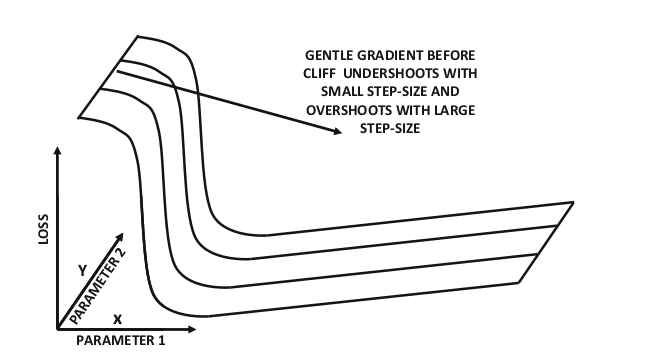

### ***Convergence Problems with Depth***

Very deep architectures have a difficult time converging to an optimal solution during backpropagation. Even when resolving the problem of vanishing and exploding gradients, the rate of convergence slows down exponentially with depth. One issue is that the partial derivatives in different layers are interdependent, and it takes a while for changes in weights in different layers to propagate to other layers (especially as depth increases). As a result, it is possible for the weights in different layers to move around without converging to an optimal solution.

### ***Local Minima***

Certain types of loss functions have a single global minimum. Such problems are referred to as *convex optimization problems*, and they represent the simplest case of optimization. A convex loss function is shaped like a bowl with a single bottom, whereas a non-convex function might have multiple “potholes” in the bowl. The convexity of a function is important from the perspective of its behavior during gradient descent. When gradient descent reaches such a pothole, it might be unable to escape from that point because the gradient at the bottom of a pothole is 0 and all instantaneous directions of movement worsen the loss function.

A deep neural network is the result of the composition of many linear dot products and nonlinear activation functions. In such cases, the overall function computed by the network is no longer convex in either the inputs or the weight variables. Therefore, gradient-descent is no longer guaranteed to converge to a global optimum. The procedure could easily get stuck in one of the “potholes” of the loss function; these spurious “minima” are also referred
to as local optima.

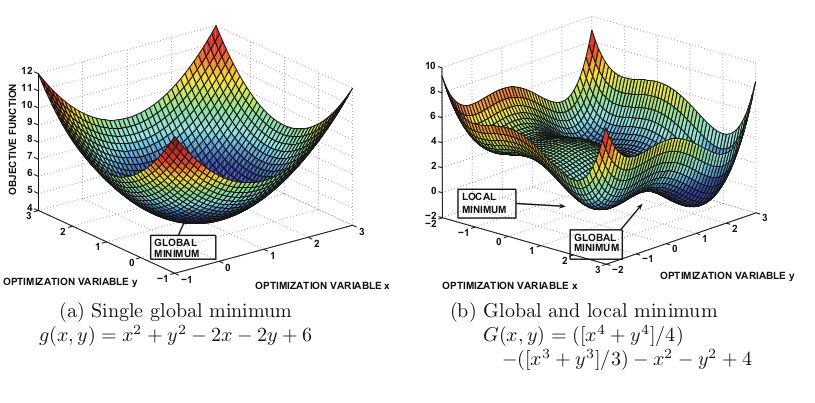

## **Depth-Friendly Neural Architectures**
Certain types of neural architectures are easier to training than others. The specific choice of the activation function and the way in which the units are connected both have an effect on gradient descent.

### ***Choice of Activation Function***
The specific choice of activation function often has a considerable effect on the severity of the vanishing gradient problem.The derivatives of the activation function are therefore extremely important to consider when training a neural network.

The gradients will saturate at values where the derivative of the activation function is zero, meaning it stops updating parameters. So the larger the range of values where the derivatives are non-zero the more robust the activation function will be during training. Also the maximum value of the activation function is important as this will place an upper bound on the gradient and will determine if it is susceptible to the vanishing or exploding gradient problem.




---
Lets us compare the previous regression problem, this time using different activation functions of *ReLU*, *ELU*, and *Tanh*. We can see that the tanh netowrk saturates fairly quickly regardless of the initialization of the parameters. The ReLU network will reduce its loss fairly quickly given a good initialization of its parameters. In some cases the initialized parameters result in a dead network, where all neurons are dead and are unable to be updated. The ELU network on the other hand always performs well as it has a large and continuous range of values where the derivative is nonzero.

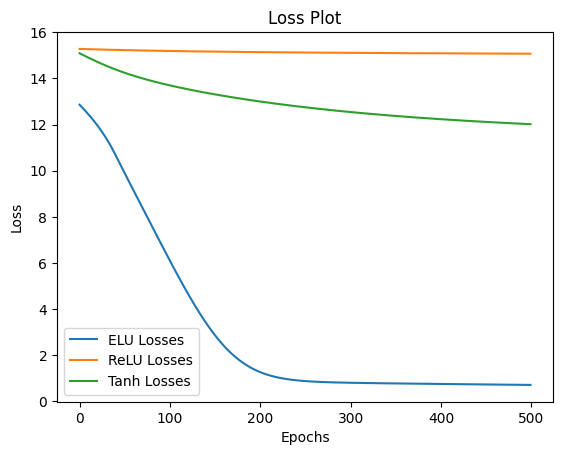

In [ ]:
# --- create the neural net ---
elu_nn = NeuralNet([
    {"size": 1, "activation_function": torch.nn.functional.elu, "activation_function_derivative": derivative_elu},
    {"size": 2, "activation_function": torch.nn.functional.elu, "activation_function_derivative": derivative_elu},
    {"size": 2, "activation_function": torch.nn.functional.elu, "activation_function_derivative": derivative_elu},
    {"size": 1, "activation_function": lambda s: s, "activation_function_derivative": lambda s: torch.ones_like(s)}])

relu_nn = NeuralNet([
    {"size": 1, "activation_function": torch.nn.functional.relu, "activation_function_derivative": lambda s: torch.where(s >= 0, 1.0, 0.0)},
    {"size": 2, "activation_function": torch.nn.functional.relu, "activation_function_derivative": lambda s: torch.where(s >= 0, 1.0, 0.0)},
    {"size": 2, "activation_function": torch.nn.functional.relu, "activation_function_derivative": lambda s: torch.where(s >= 0, 1.0, 0.0)},
    {"size": 1, "activation_function": lambda s: s, "activation_function_derivative": lambda s: torch.ones_like(s)}])

tanh_nn = NeuralNet([
    {"size": 1, "activation_function": torch.nn.functional.tanh, "activation_function_derivative": lambda s: 1.0 -  torch.nn.functional.tanh(s)**2},
    {"size": 2, "activation_function": torch.nn.functional.tanh, "activation_function_derivative": lambda s: 1.0 -  torch.nn.functional.tanh(s)**2},
    {"size": 2, "activation_function": torch.nn.functional.tanh, "activation_function_derivative": lambda s: 1.0 -  torch.nn.functional.tanh(s)**2},
    {"size": 1, "activation_function": lambda s: s, "activation_function_derivative": lambda s: torch.ones_like(s)}])

# --- set up gradient descent ---
number_of_epochs = 500
lrn_rate = 0.001

# --- create the loss function ---
loss_fn = torch.nn.MSELoss()

# --- create the trackers ---
losses_elu = []
losses_relu = []
losses_tanh = []
# --- perform gradient descent ---
for epoch in range(number_of_epochs):
    # --- compute the loss ---
    loss_elu = loss_fn(elu_nn.predict(x_data), y_data)
    loss_relu = loss_fn(relu_nn.predict(x_data), y_data)
    loss_tanh = loss_fn(tanh_nn.predict(x_data), y_data)
    # --- perform the backpropagation ---
    elu_nn.backward_step(x_data, y_data, lrn_rate, lambda s, t: -(t - s))
    relu_nn.backward_step(x_data, y_data, lrn_rate, lambda s, t: -(t - s))
    tanh_nn.backward_step(x_data, y_data, lrn_rate, lambda s, t: -(t - s))
    # --- update the trackers ---
    losses_elu.append(loss_elu.item())
    losses_relu.append(loss_relu.item())
    losses_tanh.append(loss_tanh.item())

# --- print the training details ---

# --- plot the loss over epochs ---
plt.plot(np.arange(epoch + 1), losses_elu, label="ELU Losses")
plt.plot(np.arange(epoch + 1), losses_relu, label="ReLU Losses")
plt.plot(np.arange(epoch + 1), losses_tanh, label="Tanh Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.legend()
plt.show()


### ***Maxout Networks***
Like the ReLU, the maxout function is piecewise linear. However, it does not saturate at all, and is linear almost everywhere. In spite of its linearity, it has been shown that maxout networks are universal function approximators. Maxout has advantages over the ReLU, and it enhances the performance of ensemble methods like Dropout (which we will talk about next time). However, one drawback with maxout is that it will multiply the number of parameters by the number of feature channels.

$$ h_i(x) = \max_{j\in \{1, ..., k\}} z_{ij} $$

where:
- $ h\in \Re^{m}$ where $m$ is the number of output features.
- $ z_{ij} = x^T \theta_{... ij} + b_{ij} $.
- $ x \in \Re^{d}$ where $d$ is the number of inputs.
- $ \theta \in \Re^{ d \times m \times k}$ where $k$ is the number of feature channels.
- $ z, b \in \Re^{m \times k}$

Epoch 1845  Loss: 0.1000


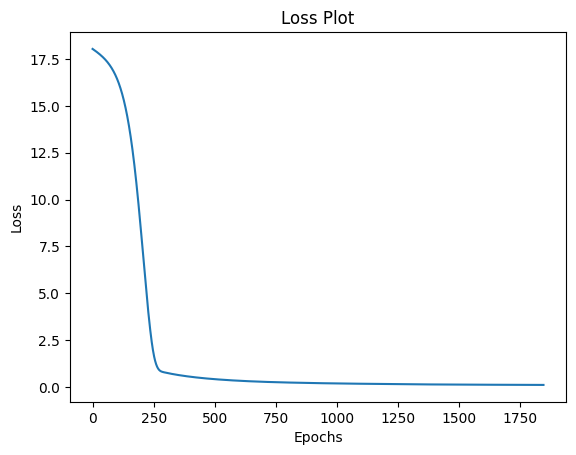

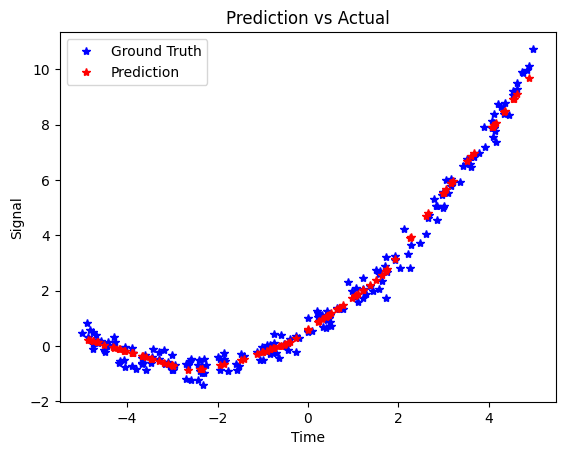

In [ ]:
class Maxout(torch.nn.Module):
    """Class Maxout implements maxout unit introduced in paper by Goodfellow et al, 2013.

    :param in_feature: Size of each input sample.
    :param out_feature: Size of each output sample.
    :param n_channels: The number of linear pieces used to make each maxout unit.
    :param bias: If set to False, the layer will not learn an additive bias.
    """

    def __init__(self, in_features, out_features, n_channels, bias=True):
        super().__init__()

        self.in_features = in_features
        self.out_features = out_features
        self.n_channels = n_channels
        self.weight = torch.nn.Parameter(torch.Tensor(n_channels * out_features, in_features))

        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(n_channels * out_features))
        else:
            self.register_parameter('bias', None)

        self.reset_parameters()

    def forward(self, input):
        a = torch.nn.functional.linear(input, self.weight, self.bias)
        b = torch.nn.functional.max_pool1d(a.unsqueeze(-3), kernel_size=self.n_channels)
        return b.squeeze()

    def reset_parameters(self):
        irange = 0.005
        torch.nn.init.uniform_(self.weight, -irange, irange)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -irange, irange)

    def extra_repr(self):
        return (f'in_features={self.in_features}, '
                f'out_features={self.out_features}, '
                f'n_channels={self.n_channels}, '
                f'bias={self.bias is not None}')


class MaxoutNetwork(torch.nn.Module):

    def __init__(self) -> None:
        super().__init__()

        self.linear_1 = torch.nn.Linear(1, 2)
        self.maxout_1 = Maxout(2, 2, 5)
        self.linear_2 = torch.nn.Linear(2, 2)
        self.maxout_2 = Maxout(2, 2, 5)
        self.linear_3 = torch.nn.Linear(2, 1)

    def forward(self, inputs):
        inputs = self.linear_1(inputs)
        inputs = self.maxout_1(inputs)
        inputs = self.linear_2(inputs)
        inputs = self.maxout_2(inputs)
        return self.linear_3(inputs)


# --- network ---
nn = MaxoutNetwork()

# --- set up gradient descent ---
number_of_epochs = 8000
lrn_rate = 0.001

# --- set up the optimizer ---
opt = torch.optim.Adam(nn.parameters(), lr=lrn_rate)

# --- create the loss function ---
loss_fn = torch.nn.MSELoss()
acceptable_loss = 0.1

# --- create the trackers ---
losses = []
# --- perform gradient descent ---
for epoch in range(number_of_epochs):
    # --- clear gradients ---
    opt.zero_grad()
    # --- compute the prediction ---
    y_prediction = nn(x_data)
    # --- compute the loss ---
    loss = loss_fn(y_prediction, y_data)
    # --- perform the backpropagation ---
    loss.backward()
    # --- update the trackers ---
    losses.append(loss.item())
    # --- step the optimizer ---
    opt.step()

    # --- stop early if loss is acceptable ---
    if loss.item() < acceptable_loss:
        break

# --- print the training details ---
print(f"Epoch {epoch}  Loss: {losses[-1]:.4f}")

# --- plot the loss over epochs ---
plt.plot(np.arange(epoch + 1), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.show()

# --- plot the prediction vs the actual ---
y_prediction = nn(x_data)

# --- plotting ---
with torch.no_grad():
  plt.plot(x_data[:], y_data[:], "*b", label="Ground Truth")
  plt.plot(x_data[torch.arange(0, number_of_data_points, 2)],
          y_prediction[torch.arange(0, number_of_data_points, 2)], "*r", label="Prediction")
  plt.xlabel("Time")
  plt.ylabel("Signal")
  plt.legend()
  plt.title("Prediction vs Actual")
  plt.show()

### ***Skip Connections***
By using a skip connection, we provide an alternative path for the gradient (with backpropagation). It is experimentally validated that this additional paths are often beneficial for the model convergence. Skip connections in deep architectures, as the name suggests, skip some layer in the neural network and feeds the output of one layer as the input to the next layers (instead of only the next one).


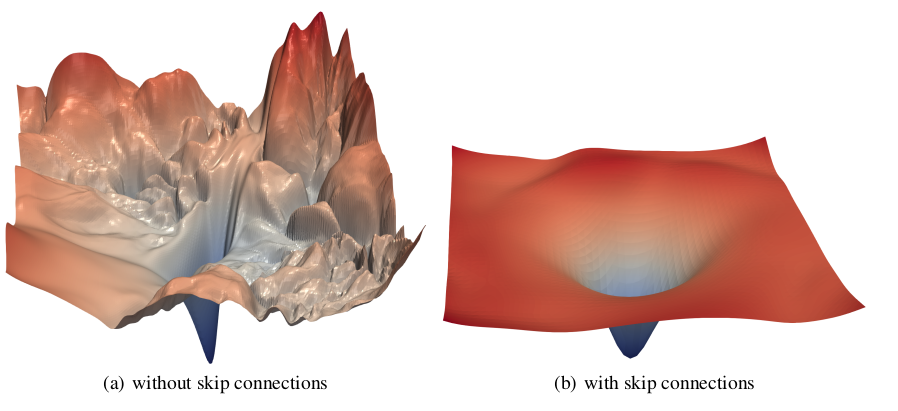

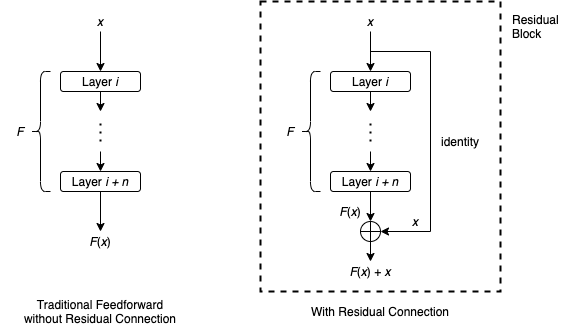

#### *Skip Connections Via Addition*
The core idea is to backpropagate through the identity function, by just using a vector addition. Then the gradient would simply be multiplied by one and its value will be maintained in the earlier layers.

#### *Skip Connections Via Concatenation*
 As stated, for many dense prediction problems, there is low-level information shared between the input and output, and it would be desirable to pass this information directly across the net. The alternative way that you can achieve skip connections is by concatenation of previous feature maps.

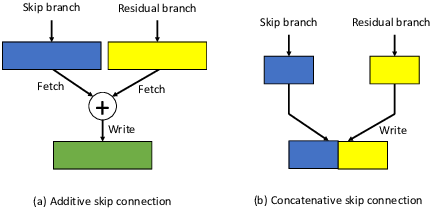

Epoch 9999  Additive Loss: 0.0956 Concat Loss: 0.1395


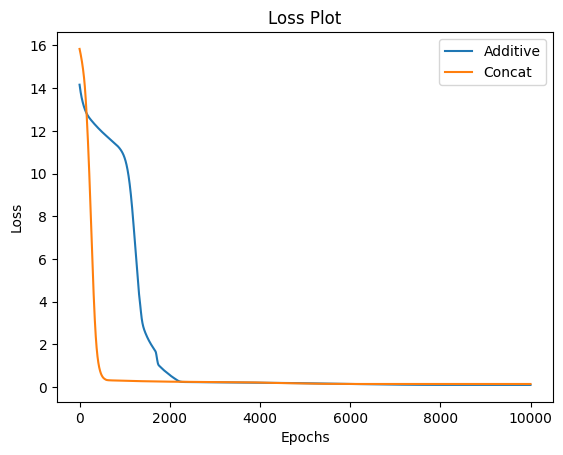

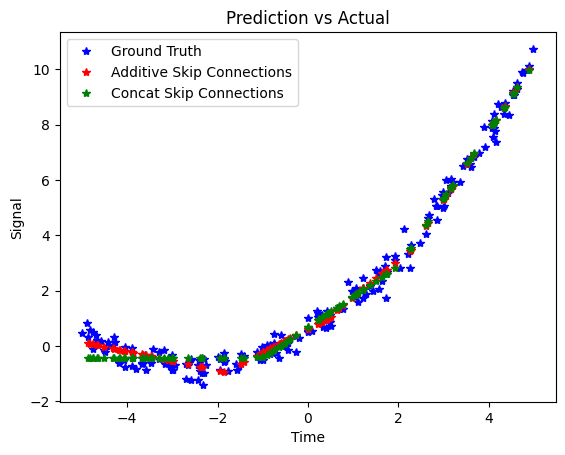

In [ ]:

class AdditiveSkipConnectionsNetwork(torch.nn.Module):

    def __init__(self) -> None:
        super().__init__()

        self.linear_1 = torch.nn.Linear(1, 2)
        self.linear_2 = torch.nn.Linear(2, 2)
        self.linear_3 = torch.nn.Linear(2, 2)
        self.linear_4 = torch.nn.Linear(2, 2)
        self.linear_5 = torch.nn.Linear(2, 1)

    def forward(self, inputs):
        x_0 = torch.nn.functional.leaky_relu(self.linear_1(inputs))
        x_1 = torch.nn.functional.leaky_relu(self.linear_2(x_0))
        x_2 = torch.nn.functional.leaky_relu(self.linear_3(x_1))
        # --- perform additive skip connection ---
        x_3 = torch.nn.functional.leaky_relu(self.linear_4(x_1 + x_2))
        return self.linear_5(x_3)


class ConcatenationSkipConnectionsNetwork(torch.nn.Module):

    def __init__(self) -> None:
        super().__init__()

        self.linear_1 = torch.nn.Linear(1, 2)
        self.linear_2 = torch.nn.Linear(2, 2)
        self.linear_3 = torch.nn.Linear(2, 2)
        self.linear_4 = torch.nn.Linear(4, 2)
        self.linear_5 = torch.nn.Linear(2, 1)

    def forward(self, inputs):
        x_0 = torch.nn.functional.leaky_relu(self.linear_1(inputs))
        x_1 = torch.nn.functional.leaky_relu(self.linear_2(x_0))
        x_2 = torch.nn.functional.leaky_relu(self.linear_3(x_1))
        # --- perform concat skip connection ---
        x_3 = torch.nn.functional.leaky_relu(self.linear_4(torch.concat([x_1, x_2], dim=-1)))
        return self.linear_5(x_3)

# --- network ---
add_nn = AdditiveSkipConnectionsNetwork()
concat_nn = ConcatenationSkipConnectionsNetwork()

# --- set up gradient descent ---
number_of_epochs = 10000
lrn_rate = 0.001

# --- set up the optimizer ---
add_opt = torch.optim.Adam(add_nn.parameters(), lr=lrn_rate)
concat_opt = torch.optim.Adam(concat_nn.parameters(), lr=lrn_rate)

# --- create the loss function ---
loss_fn = torch.nn.MSELoss()
acceptable_loss = 0.1

# --- create the trackers ---
add_losses = []
concat_losses = []
# --- perform gradient descent ---
for epoch in range(number_of_epochs):
    # --- clear gradients ---
    add_opt.zero_grad()
    concat_opt.zero_grad()
    # --- compute the prediction ---
    # --- compute the loss ---
    add_loss = loss_fn(add_nn(x_data), y_data)
    concat_loss = loss_fn(concat_nn(x_data), y_data)
    # --- perform the backpropagation ---
    add_loss.backward()
    concat_loss.backward()
    # --- update the trackers ---
    add_losses.append(add_loss.item())
    concat_losses.append(concat_loss.item())
    # --- step the optimizer ---
    add_opt.step()
    concat_opt.step()

    # --- stop early if loss is acceptable ---
    if add_loss.item() < acceptable_loss and concat_loss.item() < acceptable_loss:
        break

# --- print the training details ---
print(f"Epoch {epoch}  Additive Loss: {add_losses[-1]:.4f} Concat Loss: {concat_losses[-1]:.4f}")

# --- plot the loss over epochs ---
plt.plot(np.arange(epoch + 1), add_losses, label="Additive")
plt.plot(np.arange(epoch + 1), concat_losses, label="Concat")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.legend()
plt.show()

# --- plot the prediction vs the actual ---
add_prediction = add_nn(x_data)
concat_prediction = concat_nn(x_data)

# --- plotting ---
with torch.no_grad():
  plt.plot(x_data[:], y_data[:], "*b", label="Ground Truth")
  plt.plot(x_data[torch.arange(0, number_of_data_points, 2)],
          add_prediction[torch.arange(0, number_of_data_points, 2)], "*r", label="Additive Skip Connections")
  plt.plot(x_data[torch.arange(0, number_of_data_points, 2)],
          concat_prediction[torch.arange(0, number_of_data_points, 2)], "*g", label="Concat Skip Connections")
  plt.xlabel("Time")
  plt.ylabel("Signal")
  plt.legend()
  plt.title("Prediction vs Actual")
  plt.show()

## **Depth-Friendly Gradient Descent Strategies**
The steepest-descent direction is the optimal direction only from the perspective of infinitesimal steps, and it can worsen the objective function over a larger step. As a result, many course corrections are needed. The problem of oscillation and zigzagging is severe whenever the step is executed along a direction of high curvature in the loss function. We shall discuss several ways to overcome this.

### ***Learning Rate Decay***

It is desirable to have a high learning rate at the beginning of training and a lower learning rate towards the end. One may track the cost and reduce the learning rate as the loss stops decreasing or simply reduce it every $n$ epochs.

#### *Exponential Decay*

$\alpha_t = \alpha_o e^{-kt}$

where
- $k$ controls the rate of decay
- $t$ is the epoch step
- $\alpha_o$ is the initial learning rate

#### *Inverse Decay*

$\alpha_t = \frac{\alpha_o}{1+kt} $

### ***Feature Preprocessing***

When the variances of some features are much larger than others, it causes some weights to have much larger influence on the loss function than others. The varying sensitivity of the loss function to different weights can cause the type of zigzagging behavior.

#### *Mean Centering*

This will create a mean of the dataset centered at zero.

$z = x - \mu$

where
- $\mu = $ mean  $ = \frac{1}{N}\sum_i^N x_i$


#### *Standardization*

A common approach is to use standardization in order to make the variance of all inputs equal.

$z = \frac{x - \mu}{\sigma}$


where
- $\mu = $ mean  $ = \frac{1}{N}\sum_i^N x_i$
- $\sigma = $ standard deviation $ = \sqrt{\frac{1}{N}\sum_i^N(x_i - \mu)^2}$

#### *Min-Max Normalization*

$ z = \frac{x - x_{min}}{x_{max} - x_{min}} $

#### *Whitening*

Axis system is rotated created a new set of decorrelated features and scales features to have equal importance. Whitening, or sphering, data means that we want to transform it to have a covariance matrix that is the identity matrix.

$ D = \Lambda^{-\frac{1}{2}} U^TX$

where
- $\Lambda = \Lambda + \epsilon$ where $\epsilon$ is a small positive number. It is a matrix with the top-k eigenvalues of the covariance matrix of the data matrix $X$.
- $U = $ matrix of the top-k eigenvectors of the covariance matrix of the data matrix $X$.


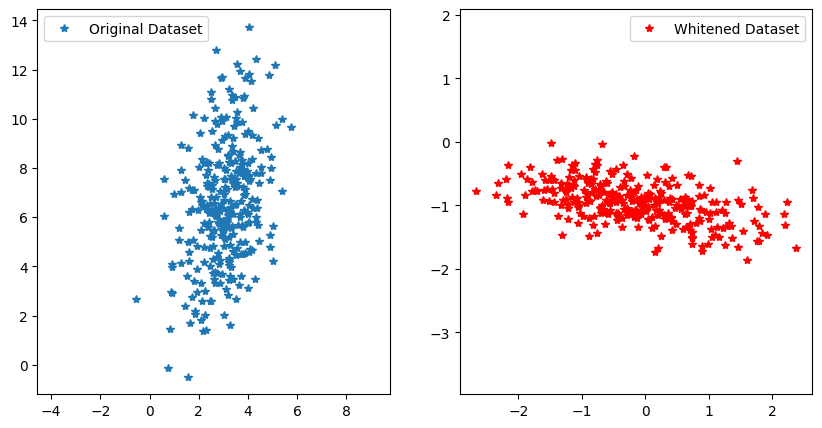

In [ ]:
np.random.seed(1234)
c1 =  np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2.
C = np.array([c1, c2]).T

def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX


def whiten(X, epsilon = 1e-6):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # --- calculate the eigenvalues and eigenvectors of the covariance matrix ---
    eigVals, eigVecs = np.linalg.eig(cov)
    # --- apply the eigenvectors to X ---
    decorrelated = X.dot(eigVecs)
    # --- rescale the decorrelated data ---
    whitened = decorrelated / np.sqrt(eigVals + epsilon)
    return whitened

D = whiten(C)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].plot(C[:,0], C[:, 1], "*", label="Original Dataset")
axes[0].axis("equal")
axes[0].legend()

axes[1].plot(D[:,0], D[:, 1], "*r", label="Whitened Dataset")
axes[1].axis("equal")
axes[1].legend()
plt.show()


### ***Parameter Initialization***

A poor initialization in a deep network can exacerbate the vanishing and exploding gradient problems. With certain types of initialized weights, the vanishing and exploding gradient problems can be exacerbated in the very beginning, from which it becomes hard for gradient descent to recover.

#### *Standard Distributions*

The initialized weights of the connections to a node are set to be proportional to the inverse of the square-root of the fan-in and/or fan-out of that node by sampling them from a normal distribution with zero mean and standard deviation parameter or a uniform distribution with a bounds parameter.


In [ ]:
weights_matrix = torch.empty((2,3))

#### *Xavier Initialization*
The goal of Xavier Initialization is to initialize the weights such that the variance of the activations are the same across every layer. This constant variance helps prevent the gradient from exploding or vanishing. Xavier initialization uses standard deviation $\sqrt{2/(r_{in} + r_{out})}$ for a normal distribution or  $\sqrt{6/(r_{in} + r_{out})}$ for the bounds of a uniform distribution.

In [ ]:
torch.nn.init.xavier_normal_(weights_matrix)

tensor([[ 0.9773,  0.0154,  0.6299],
        [-0.4903,  0.2691, -0.1467]])

In [ ]:
torch.nn.init.xavier_uniform_(weights_matrix)

tensor([[-0.3370,  0.0932,  0.2962],
        [ 0.5430, -0.7824, -0.2348]])

#### *Kaiming (He) Initialization*
He initialization is an initialization method for neural networks that takes into account the non-linearity of activation functions. It uses $gain/\sqrt{r_{in}}$ as the standard deviation for a normal distribution and $gain\sqrt{3/r_{in}}$ as the bounds for a uniform distribution. The gain is computed from the nonlinearity of the activation function.

In [ ]:
torch.nn.init.kaiming_normal_(weights_matrix, nonlinearity="relu")

tensor([[ 0.9790, -0.8267,  1.3974],
        [ 1.3686,  0.2528, -0.3089]])

In [ ]:
torch.nn.init.kaiming_normal_(weights_matrix, nonlinearity="leaky_relu")

tensor([[ 0.7814, -0.8588,  0.9280],
        [ 0.5068, -0.0678, -1.0317]])

In [ ]:
torch.nn.init.kaiming_uniform_(weights_matrix, nonlinearity="relu")

tensor([[ 0.3126,  0.7428, -0.6825],
        [-0.4072,  1.1671,  0.4871]])

### ***Advanced Optimization Techniques***

Momentum-based methods address the issues of local optima, flat regions, and curvature centric zigzagging by recognizing that emphasizing medium-term to long-term directions of consistent movement is beneficial, because they deemphasize local distortions in the loss topology. Consequently, an aggregated measure of the feedback from previous steps is used in order to speed up the gradient-descent procedure.


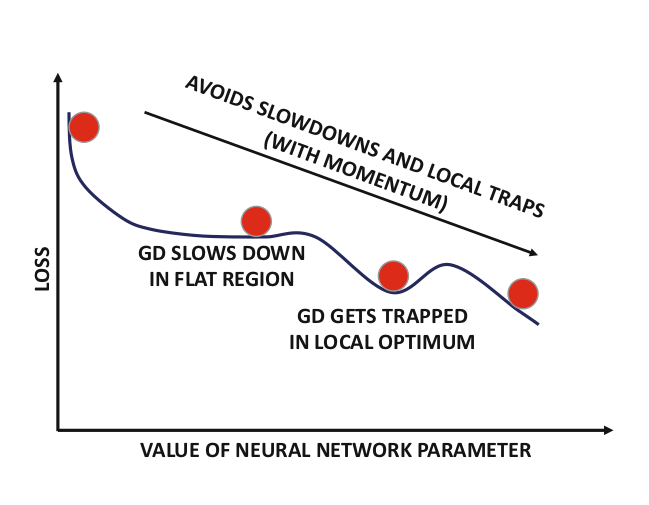

#### *Momentum Based Learning*

Consider the parameter update equation:

$\bar{\theta}^+ = \bar{\theta}^- + \bar{V}^+ $

where
- Normal:  $\bar{V}^+ = - \alpha \frac{L}{\bar{\theta}}^+ $
  - $\frac{L}{\bar{\theta}} = [\frac{L}{\theta_1}, ..., \frac{L}{\theta_d}]$
- Momentum:  $\bar{V}^+ = \beta \bar{V}^- - \alpha \frac{L}{\bar{\theta}}^+ $
  - $\beta = (0, 1)$ momentum parameter

This requires us to track the gradient portion of the last update.

#### *Parameter Specific Learning Rate*




##### **AdaGrad**
AdaGrad is a family of algorithms for stochastic optimization that uses a Hessian approximation of the cost function for the update rule. It uses that information to adapt different learning rates for the parameters associated with each feature. Therefore it tracks the aggregated partial derivative over the course of the algorithm.

$$\theta_i^+ = \theta_i^- - \frac{\alpha}{\sqrt{A_i^+ + \epsilon}}(\frac{\partial L}{\partial \theta_i})$$

where:
- $ A_i^+ = A_i^- + (\frac{\partial L}{\partial \theta_i})^2$
  - The aggregated value of the partial derivative for each parameter $\theta_i$.
- $\frac{1}{\sqrt{A_i^+\epsilon}} = $ a signal-to-noise normalizer.
- $\epsilon = $ a very small number (e.g. $1e10^{-8}$)

##### **RMSProp**
RMSProp lies in the realm of adaptive learning rate methods, which have been growing in popularity in recent years because it is the extension of Stochastic Gradient Descent (SGD) algorithm, momentum method, and the foundation of Adam algorithm. It uses exponential averaging and does not slow the learning prematurely. However, since the initial running estimate starts at 0, it causes some undesirable bias in early iterations.

$$\theta_i^+ = \theta_i^- - \frac{\alpha}{\sqrt{A_i^+ + \epsilon}}(\frac{\partial L}{\partial \theta_i})$$

where:
- $ A_i^+ = \rho A_i^- + (1-\rho)(\frac{\partial L}{\partial \theta_i})^2$
  - $\rho \in (0, 1)$
- $\epsilon = $ a very small number (e.g. $1e10^{-8}$)

##### **AdaDelta**
The method dynamically adapts over time using only first order information and has minimal computational overhead beyond vanilla stochastic gradient descent. The method requires no manual tuning of a learning rate and appears robust to noisy gradient information, different model architecture choices, various data modalities and selection of hyperparameters.

$$\theta_i^+ = \theta_i^- - \Delta\theta_i^+$$

where:
- $ \Delta\theta_i^+ = \sqrt{\frac{\delta_i^+ + \epsilon}{A_i^+ + \epsilon}}(\frac{\partial L}{\partial \theta_i})$
- $ A_i^+ = \rho A_i^- + (1-\rho)(\frac{\partial L}{\partial \theta_i})^2$
- $ \delta_i^+ = \rho \delta_i^- + (1-\rho)(\Delta\theta_i^-)^2$
- $\rho \in (0, 1)$
- $\epsilon = $ a very small number (e.g. $1e10^{-8}$)


##### **Adam**
The Adam algorithm uses a similar “signal-to-noise” normalization as AdaGrad and RMSProp; however, it also incorporates momentum into the update. In addition, it directly addresses the initialization bias inherent in the exponential smoothing of pure RMSProp.

$$\theta_i^+ = \theta_i^- - \frac{\alpha_t}{\sqrt{A_i^+ + \epsilon}}F_i^+$$

where:
- $ \Delta\theta_i^+ = \sqrt{\frac{\delta_i^+ + \epsilon}{A_i^+ + \epsilon}}(\frac{\partial L}{\partial \theta_i})$
- $ A_i^+ = \rho A_i^- + (1-\rho)(\frac{\partial L}{\partial \theta_i})^2$
- $ F_i^+ = \rho_f F_i^- + (1-\rho_f)(\frac{\partial L}{\partial \theta_i})$
- $\alpha_t = \alpha \frac{\sqrt{1- \rho^t}}{1-\rho_f^t}$ for iteration $t \in [1, \infty) $
- $\rho, \rho_f \in (0, 1)$
- $\epsilon = $ a very small number (e.g. $1e10^{-8}$)
- recommended values $\rho = 0.999$ and $\rho_f = 0.9$.


### ***Gradient Clipping***
Clipping the values of the partial derivatives helps remove the large differences between gradients in different layers.

## ***Batch Normalization***

Batch normalization is a recent method to address the vanishing and exploding gradient problems, which cause activation gradients in successive layers to either reduce or increase in magnitude. Another important problem in training deep networks is that of internal covariate shift. The problem is that the parameters change during training, and therefore the hidden variable activations change as well. In other words, the hidden inputs from early
layers to later layers keep changing. Changing inputs from early layers to later layers causes slower convergence during training because the training data for later layers is not stable. Batch normalization is able to reduce this effect.

Works over mini-batches and learns two additional parameters per unit, the mean and standard deviation. The layer has one input and its only job is to preform normalization and scaling. This layer type acts differently during training and test time so its important to remember to enforce the `model.train()` when training and `model.eval()` during test time.

Batch normalization should be applied prior to calling the activation function for a layer.

Epoch 3465  Loss: 0.1000


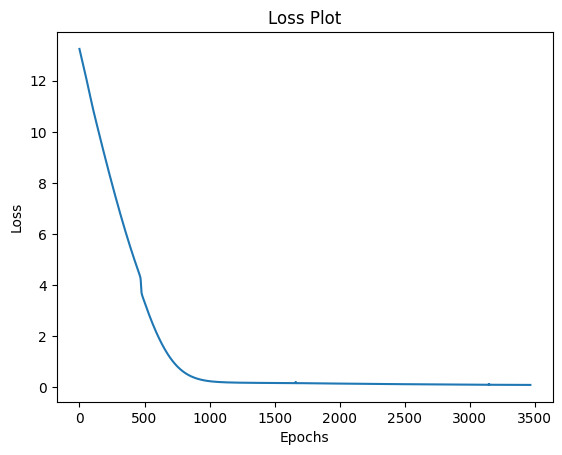

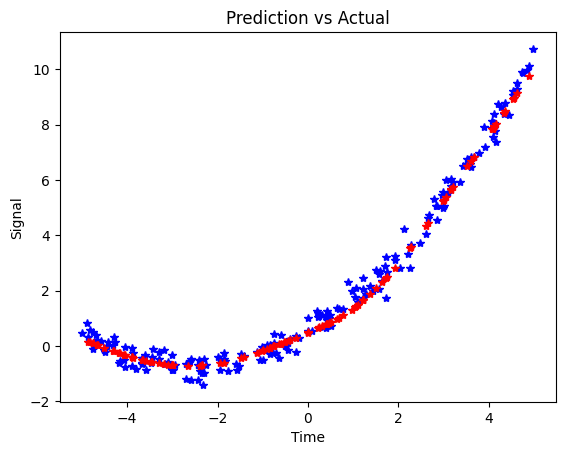

In [ ]:
class NetworkWithBatchNorm(torch.nn.Module):

    def __init__(self) -> None:
        super().__init__()

        self.linear_1 = torch.nn.Linear(1, 2)
        self.linear_2 = torch.nn.Linear(2, 2)
        self.linear_3 = torch.nn.Linear(2, 1)

        self.bn_1 = torch.nn.BatchNorm1d(2)
        self.bn_2 = torch.nn.BatchNorm1d(2)


    def forward(self, inputs):
        inputs = self.linear_1(inputs)
        inputs = torch.nn.functional.elu(self.bn_1(inputs))
        inputs = self.linear_2(inputs)
        inputs = torch.nn.functional.elu(self.bn_2(inputs))
        return self.linear_3(inputs)

# --- network ---
nn = NetworkWithBatchNorm()

# --- set up gradient descent ---
number_of_epochs = 10000
lrn_rate = 0.001

# --- set up the optimizer ---
opt = torch.optim.Adam(nn.parameters(), lr=lrn_rate)

# --- create the loss function ---
loss_fn = torch.nn.MSELoss()
acceptable_loss = 0.1

# --- create the trackers ---
losses = []
# --- perform gradient descent ---
nn.train()
for epoch in range(number_of_epochs):
    # --- clear gradients ---
    opt.zero_grad()
    # --- compute the loss ---
    loss = loss_fn(nn(x_data), y_data)
    # --- perform the backpropagation ---
    loss.backward()
    # --- update the trackers ---
    losses.append(loss.item())
    # --- step the optimizer ---
    opt.step()

    # --- stop early if loss is acceptable ---
    if loss.item() < acceptable_loss:
        break

# --- put the model in eval mode ---
nn.eval()

# --- print the training details ---
print(f"Epoch {epoch}  Loss: {losses[-1]:.4f}")

# --- plot the loss over epochs ---
plt.plot(np.arange(epoch + 1), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.show()

# --- plot the prediction vs the actual ---
y_prediction = nn(x_data)

# --- plotting ---
with torch.no_grad():
  plt.plot(x_data[:], y_data[:], "*b", label="Ground Truth")
  plt.plot(x_data[torch.arange(0, number_of_data_points, 2)],
           y_prediction[torch.arange(0, number_of_data_points, 2)], "*r", label="Predictions")
  plt.xlabel("Time")
  plt.ylabel("Signal")
  plt.title("Prediction vs Actual")
  plt.show()